In [43]:
#housingデータ取得
import pandas as pd

df = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch10/housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


C:\Users\y-kobayashi\Anaconda3\envs\rein-env\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


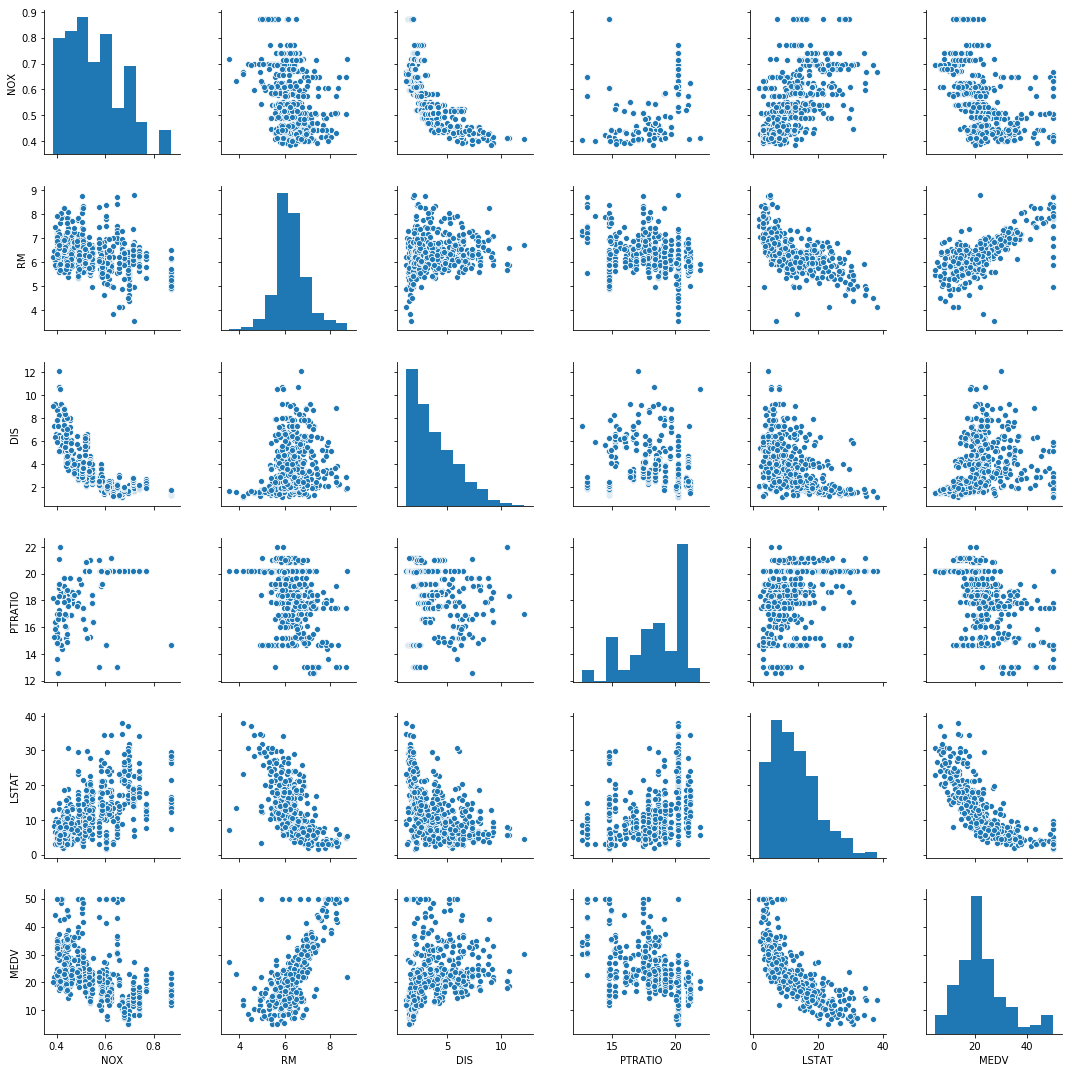

In [45]:
#データ特徴の視覚化1
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']
# cols = ['NOX', 'RM', 'AGE', 'DIS', 'MEDV']
# cols = ['RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# cols = ['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'MEDV']


sns.pairplot(df[cols], size=2.5)

plt.tight_layout()
plt.show()


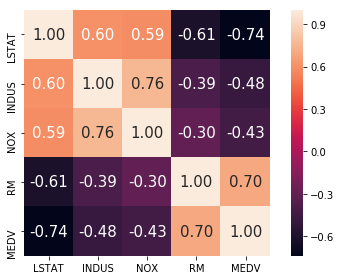

In [3]:
#データ特徴の視覚化2
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

plt.tight_layout()
plt.show()

In [4]:
#線形回帰クラス
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        
        self.eta=eta
        self.n_iter=n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        
        return self.net_input(X)
    


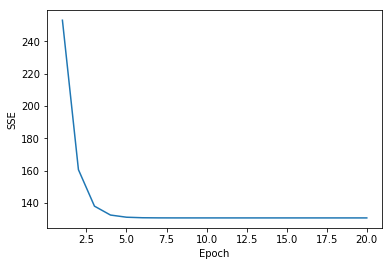

In [23]:
#線形回帰モデルへのfitと二乗残差のプロット
from sklearn.preprocessing import StandardScaler

X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.show()



In [24]:
#回帰プロット関数
def lin_regplot(X, y, model):
    
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    
    return

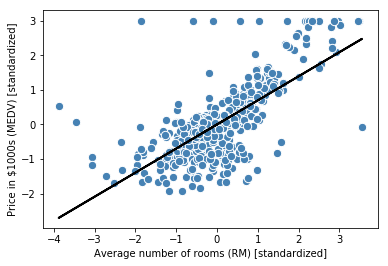

y=ax+b: a=0.70 b=-0.00
MSE train: 0.516, test: 0.000
R^2 train: 0.484, test: 0.000


In [36]:
#線形回帰モデルのプロット
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms (RM) [standardized]')
plt.ylabel('Price in $1000s (MEDV) [standardized]')
plt.show()

print('y=ax+b: a=%.2f b=%.2f' % (lr.w_[1], lr.w_[0]))


In [8]:
#標準化から元の値に変換
num_room_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_room_std)
sc_y.inverse_transform(price_std)

array([10.83993289])

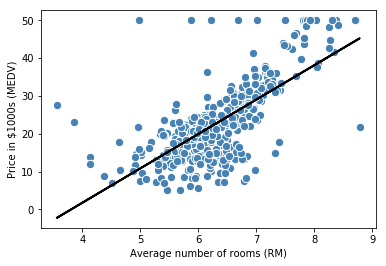

y=ax+b: a=9.10 b=-34.67


In [9]:
#scikit-learn での線形回帰
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Price in $1000s (MEDV)')
plt.show()

print('y=ax+b: a=%.2f b=%.2f' % (slr.coef_, slr.intercept_))

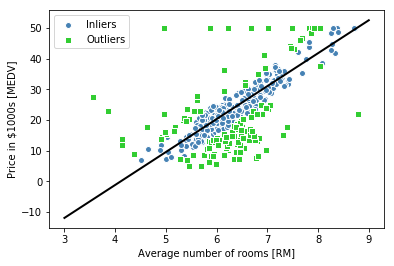

Slope: 10.735
Intercept: -44.089
MSE train: 45.620, test: 0.000
R^2 train: 0.460, test: 0.000


In [41]:
#RANSACの利用
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0)
ransac.fit(X,y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')

plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y, ransac.predict(X)), 0))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y, ransac.predict(X)), 0))